# Tutorial

In [1]:
import numpy as np
import acoular

Reading the data:

In [2]:
ts = acoular.TimeSamples(name='three_sources.h5')

Creating the power spectra (object containing the cross spectral matrix):

In [3]:
ps = acoular.PowerSpectra(time_data=ts, block_size=128, window='Hanning')

Creating grid where the sources can possibly be located 

In [4]:
rg = acoular.RectGrid(
    x_min=-0.2,
    x_max=0.2,
    y_min=-0.2,
    y_max=0.2,
    z=0.3,
    increment=0.01
    )

Importing the locations of the microphones

In [5]:
from os import path

micgeofile = path.join(path.split(acoular.__file__)[0],'xml','array_64.xml')
mg = acoular.MicGeom(from_file=micgeofile)

Plotting position of the microphones

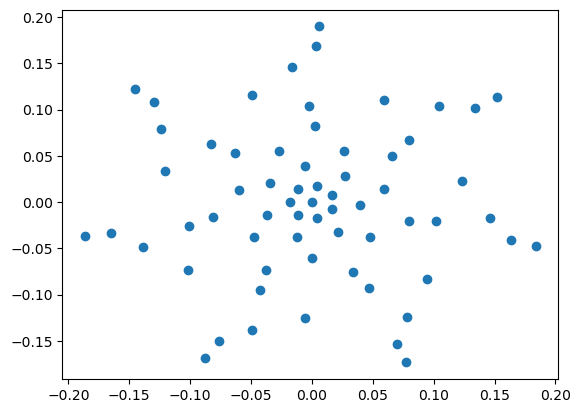

In [6]:
import pylab as plt

plt.ion() # switch on interactive plotting mode
plt.plot(mg.mpos[0],mg.mpos[1],'o')

Creating the steering vector

In [7]:
st = acoular.SteeringVector(grid=rg, mics=mg)

Creating the object that encapsulates the delay-and-sum algorithm (beamforming)

In [8]:
bb = acoular.BeamformerBase(freq_data=ps, steer=st)

The beamforming result mapped onto the grid is queried for a frequency of 8000 Hz and over a third-octave wide frequency band (thus the ‘3’ in the second argument).

Then, the processing starts:
- The data is read from the file
- The cross spectral matrix is computed
- The beamforming is performed. 

Finally, the result (sound pressure squared) is given as an array with the same shape as the grid. Using the helper function L_p, this is converted to decibels

In [9]:
pm = bb.synthetic(8000, 3)
[('three_sources_cache.h5', 1)]

Lm = acoular.L_p(pm)

[('three_sources_cache.h5', 1)]


Plotting the result of the beamforming:

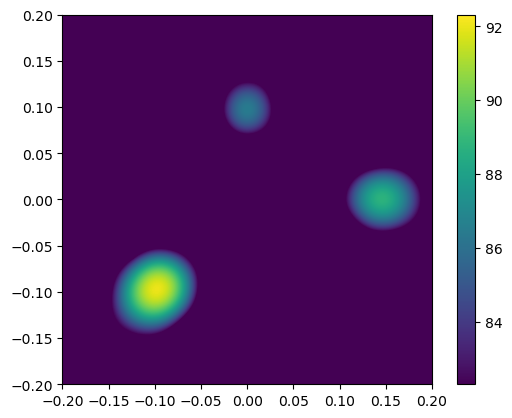

In [10]:
plt.figure() # open new figure
plt.imshow(Lm.T, origin='lower', vmin=Lm.max()-10, extent=rg.extend(), interpolation='bicubic')
plt.colorbar()


# Reproduction of the plot of the thesis task

Synthesized and experimentally obtained eigenvalue spectra of the cross-spectral matrix at different frequencies for a single source measured with the setup

-> need to simulate data for a single source.
-> from what I have seen, the data generation is not done with Acoular, rather with Acoupipe -> Have a look into it tomorrow

In [ ]:
# What we want to generate is the following -> CSM

# apparently the data can be obtained in this form 
# 
# TimeSamples (= Container for time data in *.h5 format.) ->  PowerSpectra -> CSM

# We want n_sources = 1

# run main.py from simulation with args "--nsources 1 --features csm --fileformat h5" to generate

# then use generated data as TimeSamples -> easy shit 

In [21]:
import acoupipe
from scipy.stats import norm
# In this cells -> data need to be generated

# need to create data (timestamps ts_single_source) for a single source
ts_single_source = 0


random_var = norm(loc=1.,scale=.5)

n1 = acoular.WNoiseGenerator( sample_freq=24000,
                numsamples=24000*5,
                rms=1.0,
                seed=1 )

n2 = acoular.WNoiseGenerator( sample_freq=24000,
                numsamples=24000*5,
                rms=.5,
                seed=2 )

rms_sampler = acoupipe.NumericAttributeSampler(
                target=[n1,n2],
                attribute='rms',
                random_var=random_var,
                random_state=10)

print(dir(rms_sampler))
"""
rms_sampler.sample()

def calculate_csm(powerspectra):
    return powerspectra.csm

pipeline = acoupipe.BasePipeline(
    sampler=[rms_sampler],
    numsamples = 5,
    features={'csm' : (calculate_csm, ps),}
    )

data_generator = pipeline.get_data()

print(dir(data_generator))"""

['__base_traits__', '__class__', '__class_traits__', '__deepcopy__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__instance_traits__', '__le__', '__listener_traits__', '__lt__', '__module__', '__ne__', '__new__', '__observer_traits__', '__prefix_trait__', '__prefix_traits__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__view_traits__', '__weakref__', '_add_class_trait', '_class_traits', '_each_trait_method', '_flush_traits_cache', '_get_instance_handlers', '_get_sync_trait_info', '_init_trait_delegate_listener', '_init_trait_event_listener', '_init_trait_listeners', '_init_trait_method_listener', '_init_trait_observers', '_init_trait_property_listener', '_init_trait_view_elements', '_instance_changed_handler', '_instance_traits', '_is_list_trait', '_list_changed_handler', '_list_it

"\nrms_sampler.sample()\n\ndef calculate_csm(powerspectra):\n    return powerspectra.csm\n\npipeline = acoupipe.BasePipeline(\n    sampler=[rms_sampler],\n    numsamples = 5,\n    features={'csm' : (calculate_csm, ps),}\n    )\n\ndata_generator = pipeline.get_data()\n\nprint(dir(data_generator))"

In [ ]:
# need to create data (timestamps ts_single_source) for a single source
ts_single_source = acoular.TimeSamples(name='three_sources.h5')

# use it to create power spectra
ps_single_source =  acoular.PowerSpectra(time_data=ts_single_source, block_size=128, window='Hanning')

In [ ]:
csm = np.average(ps_single_source.csm, axis=0)

eva = np.linalg.eigvals(csm)
eva = np.sort(eva)
eva = np.normalize(eva)

# convert eigenvalue into levels


eva_lvl = 10*np.log10(eva/np.max(eva))

# plotting
plt.plot(np.arange(eva_lvl.shape[0]), eva_lvl)

In [ ]:
print(np.allclose(csm, csm.T))